In [31]:
import pandas as pd

In [32]:
import numpy as np

In [33]:
import matplotlib.pyplot as plt

In [34]:
df= pd.read_csv("carprices.csv")

In [35]:
df

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi,59000,29400,5
6,Audi,52000,32000,5
7,Audi,72000,19300,6
8,Audi,91000,12000,8
9,Mercedez Benz,67000,22000,6


In [36]:
dummies=pd.get_dummies(df['Car Model'])

In [37]:
dummies

,Audi,BMW X5,Mercedez Benz,Toyota
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,1,0


In [38]:
merged=pd.concat([df,dummies],axis='columns')

In [39]:
merged

,Car Model,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,BMW X5,69000,18000,6,0,1,0,0
1,BMW X5,35000,34000,3,0,1,0,0
2,BMW X5,57000,26100,5,0,1,0,0
3,BMW X5,22500,40000,2,0,1,0,0
4,BMW X5,46000,31500,4,0,1,0,0
5,Audi,59000,29400,5,1,0,0,0
6,Audi,52000,32000,5,1,0,0,0
7,Audi,72000,19300,6,1,0,0,0
8,Audi,91000,12000,8,1,0,0,0
9,Mercedez Benz,67000,22000,6,0,0,1,0


In [40]:
final=merged.drop(['Car Model'],axis='columns')

In [41]:
y=final['Sell Price']

In [42]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
13    42000
14    32000
15    55000
Name: Sell Price, dtype: int64

In [43]:
X= final[['Mileage', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ','Toyota']]

In [44]:
final.shape

(16, 7)

In [45]:
final.columns

Index(['Mileage', 'Sell Price', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ',
       'Toyota'],
      dtype='object')

In [46]:
X

,Mileage,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,69000,6,0,1,0,0
1,35000,3,0,1,0,0
2,57000,5,0,1,0,0
3,22500,2,0,1,0,0
4,46000,4,0,1,0,0
5,59000,5,1,0,0,0
6,52000,5,1,0,0,0
7,72000,6,1,0,0,0
8,91000,8,1,0,0,0
9,67000,6,0,0,1,0


In [50]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)


In [55]:
#Train Model 
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

#predict
reg.predict(X_test)

array([43580.37257019, 45795.84233261, 22638.71490281, 23759.55723542,
       33463.98488121])

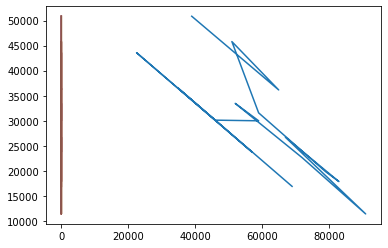

In [57]:
#best fit line
#plt.plot(X,reg.predict(X))

In [58]:
reg.coef_

array([-4.96274298e-01, -8.99784017e+02, -1.32474352e+03, -8.54779968e+03,
        2.61487581e+02,  9.61105562e+03])

In [59]:
reg.intercept_

65093.91198704105

In [68]:
reg.score(X_test,y_test)

0.872244858665519

In [69]:
reg.predict([[72000,4,0,0,0,1]])

array([35374.08207343])